## GRIP Task 2 - Prediction using Unsupervised ML

## Created by: Manju Vijayakumar

### Problem Statement

#### From the given 'Iris' dataset, predict the optimum number and represent it visually

In [ ]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# clustering libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# adjust jupyter views

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [ ]:
# read the data

iris_data = pd.read_csv('Iris.csv')
print(iris_data.head())
print(iris_data.tail())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
145  146            6.7           3.0            5.2           2.3  Iris-virginica
146  147            6.3           2.5            5.0           1.9  Iris-virginica
147  148            6.5           3.0            5.2           2.0  Iris-virginica
148  149            6.2           3.4            5.4           2.3  Iris-virginica
149  150            5.9           3.0            5.1           1.8  Iris-virginica


In [ ]:
# Basic EDA
# Checking for missing values
iris_data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Duplicate data check
iris_data.duplicated().sum()

0

In [ ]:
# Frequency distribution of Species
pd.crosstab(iris_data.Species, columns = 'count')

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


We can see that Iris dataset contains 4 different features of Species Iris-setosa, Iris-versicolor, Iris-virginica with 50 samples each

In [ ]:
# Column Id is for unique row identification. Dropping the same
iris_data = iris_data.drop(['Id'], axis = 1)
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species'], dtype='object')

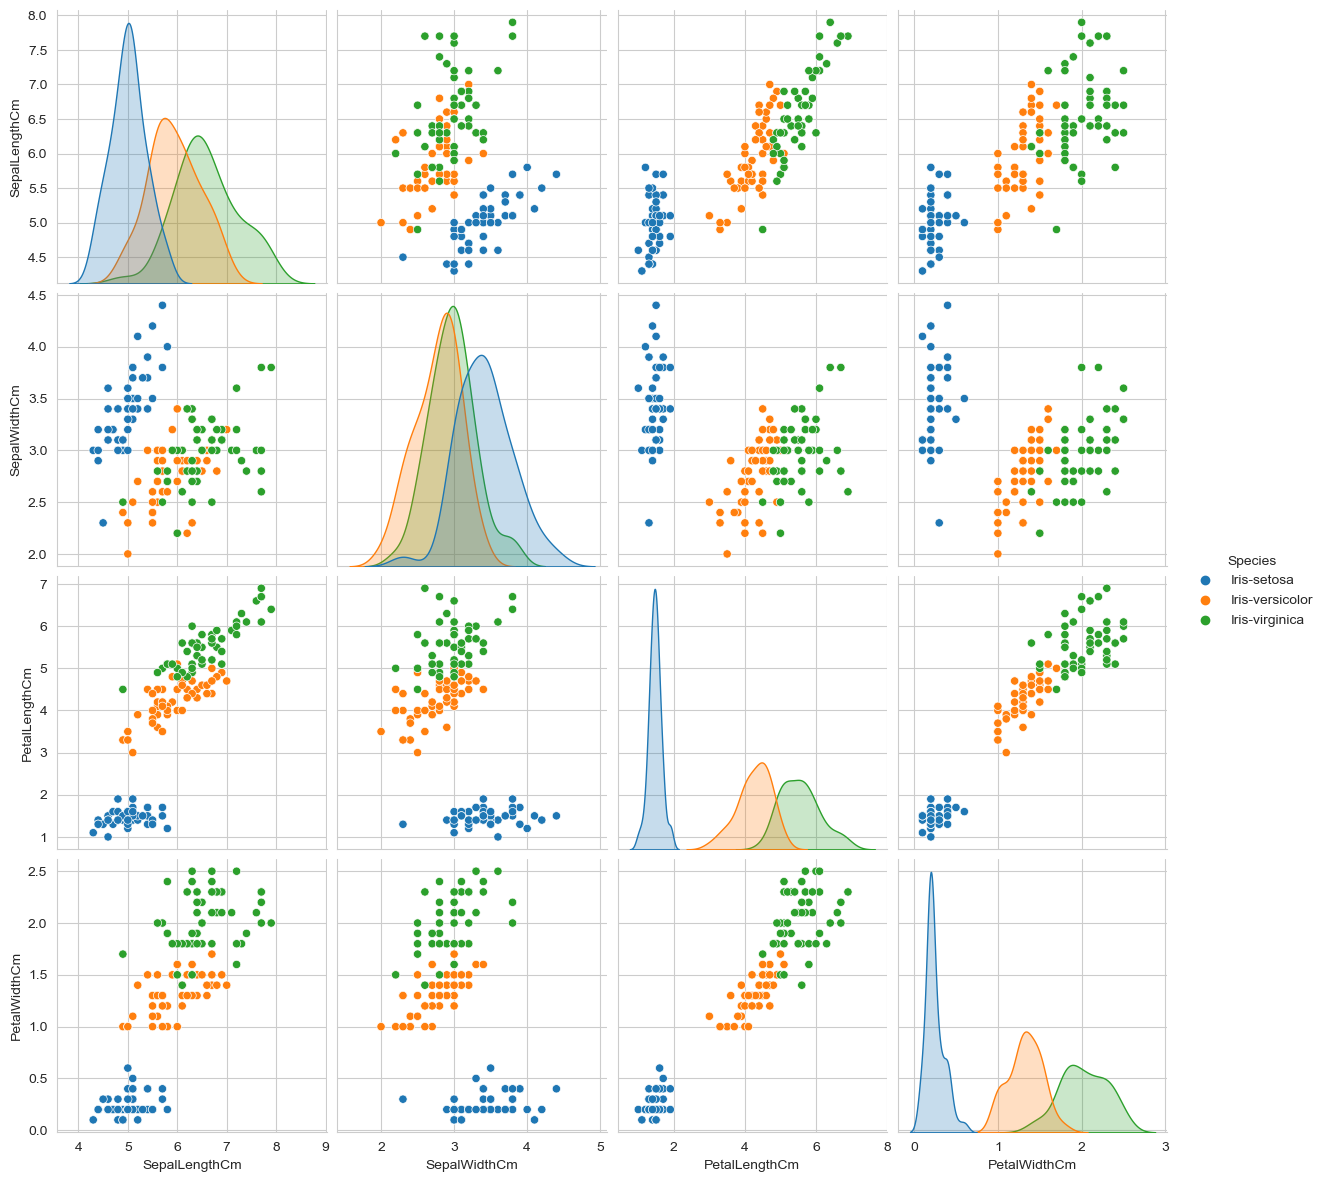

In [ ]:
# Lets check the pairwise relation between the variable in the dataset
sns.set_style('whitegrid')
sns.pairplot(iris_data, hue = 'Species', size = 3)
plt.show()

iris-setosa displays a separation compared to iris-versicolor and iris-virginica

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# It is always advisable to bring all features to same scale before applying distance based algorithms like KMeans
# Clustering to done on numerical columns

iris_num = iris_data.iloc[:,0:4]
iris_num.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [ ]:
X = StandardScaler()
iris_scaled = X.fit_transform(iris_num)

pd.DataFrame(iris_scaled, columns = iris_num.columns).tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956
149,0.068662,-0.124958,0.762759,0.790591


In [ ]:
# Outlier percentage

Q1 = iris_num.quantile(0.25)
Q3 = iris_num.quantile(0.75)
IQR = Q3 - Q1

pd.DataFrame((((iris_num < (Q1 - 1.5 * IQR)) | (iris_num > (Q3 + 1.5 * IQR))).sum()/iris_num.shape[0]*100).round(2), 
                    columns = ['Outliers %']).sort_values(by = 'Outliers %', ascending = False).T


,SepalWidthCm,SepalLengthCm,PetalLengthCm,PetalWidthCm
Outliers %,2.67,0.0,0.0,0.0


In [ ]:
# K-means is a centroid based algorithm or a distance based algorithm where we calculate distances to assign a point to a cluster
# Finding the optimum number of clusters. Inertia measures how well a dataset was clustered by k-means. A good model is one with low inertia and a low number of clusters (K)

WCSS = []

for i in range(1, 15):
    KM = KMeans(n_clusters = i, init = 'k-means++', random_state = 3)
    KM.fit(iris_scaled)
    WCSS.append(KM.inertia_)

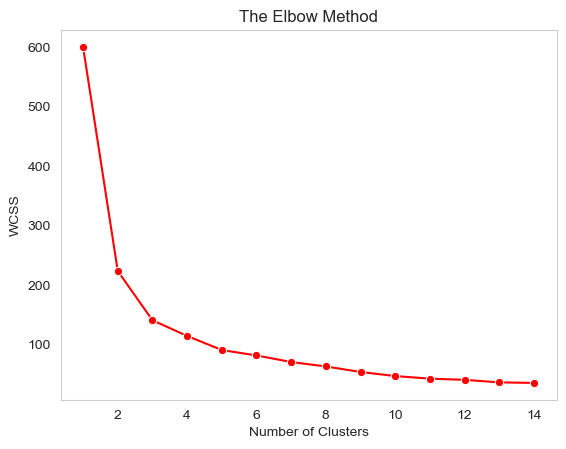

In [ ]:
# An elbow plot for visualizing the optimum number of clusters

# plt.figure(figsize = (10,5))
sns.lineplot(x = range(1,15), y = WCSS, marker = 'o', color = 'red')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
# plt.axvline(3, color = 'black', linestyle = '--')
plt.grid()
plt.show()

In [ ]:
# The elbox point can be determined with the help of python package Kneed

from kneed import KneeLocator

kl = KneeLocator(range(1, 15), WCSS, curve = 'convex', direction = 'decreasing')
kl.elbow

3

In [ ]:
# Optimum number of clusters in given dataset is 3

# 3 clusters
KM_3clus = KMeans(n_clusters = 3)
y = KM_3clus.fit_predict(iris_scaled)
# y = KM_3clus.
labels_3 = KM_3clus.labels_
unique, counts = np.unique(labels_3, return_counts = True )
print('3 clusters :', unique, counts)

3 clusters : [0 1 2] [47 50 53]


In [ ]:
# silhouette score represents how well the data point has been clustered and scores above 0 are seen as good

from sklearn.metrics import silhouette_samples, silhouette_score

print('Sihouette score of 3 clusters:', round(silhouette_score(iris_scaled, labels_3), 3))

Sihouette score of 3 clusters: 0.459


In [ ]:
# Visualising clusters

x = iris_num.values

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 3)
y_kmeans = kmeans.fit_predict(x)

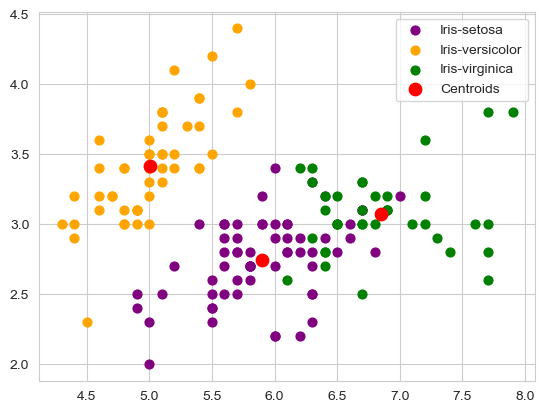

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 40, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 40, c = 'orange', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 40, c = 'green', label = 'Iris-virginica')

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 80, c = 'red', label = 'Centroids')

plt.legend()
plt.show()